In [221]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [235]:
df = pd.read_csv("../../datasets/emip-enhanced/data/95_rawdata.tsv", sep="\t", comment="#")
df_fixations = pd.read_csv("../../datasets/emip-fixations/data/95_rawdata.tsv", sep="\t", comment="#")

In [236]:
calibration_df = df[df["status"] == "CALIBRATION"]
calibration_avg = calibration_df["L Mapped Diameter [mm]"].mean()
print(calibration_avg)
df = df[df["status"] == "READING"]
df = df[["L Mapped Diameter [mm]"]]
df = df.replace({0: np.nan})
df = df.dropna()
df

3.0862924281984343


,L Mapped Diameter [mm]
8195,3.01
8196,3.02
8197,3.02
8198,3.03
8199,3.02
...,...
39539,3.02
39540,3.01
39541,3.01
39542,3.01


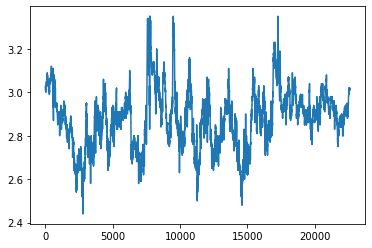

In [237]:
plt.plot(df["L Mapped Diameter [mm]"].values)
plt.show()

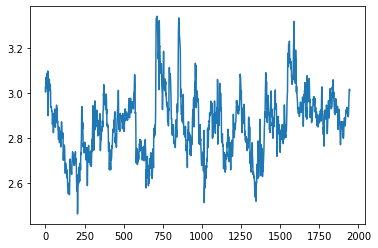

,Unnamed: 0,fixationStart,fixationEnd,duration,x,y,averagePupilSize,trial_number,status
212,347,6755857.0,6755957.0,100.0,1477.585385,406.148462,3.025000,1.0,READING
213,348,6755965.0,6755997.0,32.0,1459.225556,419.770000,3.004444,1.0,READING
214,349,6756037.0,6756273.0,235.0,776.262000,214.891333,3.038000,1.0,READING
215,350,6756293.0,6756345.0,51.0,732.793571,54.200000,3.049286,1.0,READING
216,351,6756353.0,6756576.0,223.0,728.121404,73.187544,3.069474,1.0,READING
...,...,...,...,...,...,...,...,...,...
2586,2721,6888640.0,6888676.0,36.0,1061.749000,280.914000,3.003000,2.0,READING
2587,2722,6888692.0,6888720.0,28.0,987.987500,256.930000,3.016250,2.0,READING
2588,2723,6888728.0,6888792.0,64.0,975.831765,241.593529,3.015294,2.0,READING
2589,2724,6888800.0,6888860.0,60.0,971.735000,223.918750,3.016250,2.0,READING


In [238]:
df_fixations = df_fixations[df_fixations["status"] == "READING"]
plt.plot(df_fixations["averagePupilSize"].values)
plt.show()
df_fixations

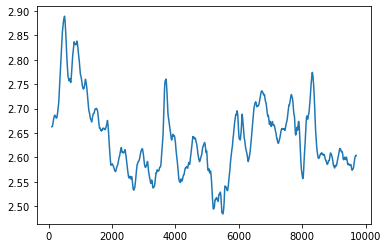

In [230]:
df['rolling'] = df['L Mapped Diameter [mm]'].rolling(100).mean()
plt.plot(df["rolling"].values)

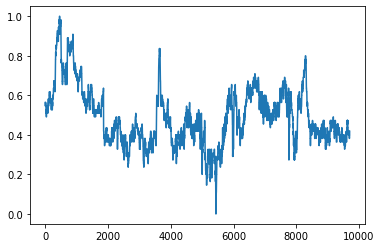

In [215]:
normalized_df = (df-df.min())/(df.max()-df.min())
plt.plot(normalized_df["L Mapped Diameter [mm]"].values)

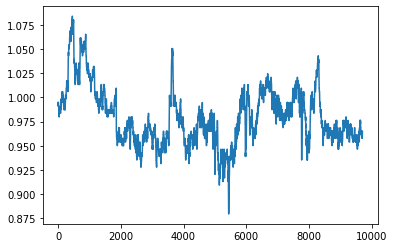

In [107]:
normalized_df = df/calibration_avg
plt.plot(normalized_df["L Mapped Diameter [mm]"].values)

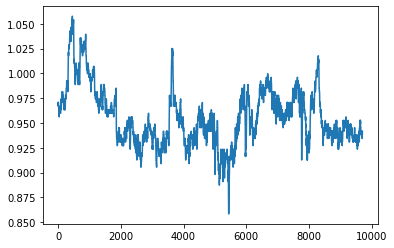

In [108]:
avg_first_30 = df.iloc[0:750, 0].mean()
normalized_df = df/avg_first_30
plt.plot(normalized_df["L Mapped Diameter [mm]"].values)

In [83]:
avg_first_30

4629    2.88
4630    2.88
4631    2.88
4632    2.88
4633    2.88
        ... 
5405    3.01
5406    3.00
5407    2.99
5408    2.98
5409    2.98
Name: L Mapped Diameter [mm], Length: 750, dtype: float64